In [1]:
from pole import Pole
from typing import List

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# elements 1 is normal place; element 0 is przeszkoda; element -1 is meta; element 2 is start
tablica_elementow = [[1, 1, 1, 2, 1], [1, 1, 0, 0, 1],
                     [1, 1, 1, 1, 1], [1, 0, 0, 1, 1], [1, 1, -1, 1, 0]]

In [3]:
global_object_table = Pole.array_creation(tablica_elementow)
# Pole.print_all_items()
#a star engine
print(len(global_object_table))

def distance_calculator(place1:Pole,place2:Pole)->int:
    distance_x=abs(place1.x_position-place2.x_position) 
    distance_y=abs(place1.y_position-place2.y_position)
    return distance_x+distance_y
    

5


In [4]:
def a_star_engine(global_object_table:List[List[Pole]]):

    open_list=[]
    closed_list=[]

    open_list.append(global_object_table[0][3])
    finded=False
    while(len(open_list)!=0 and finded!=True):
        minimum=min([element.value_of_f for element in open_list])
        index_with_min=-1
        for index,element in enumerate(open_list):
            if element.value_of_f==minimum:
                index_with_min=index
                break

        q=open_list.pop(index_with_min)
        for neigh in q.list_of_neighbors:
            if neigh is not None and neigh.value!=0:
                if neigh.value==-1:
                    print("Znalazłem")
                    finded=True
                    break
                neigh.g=q.g+distance_calculator(neigh,q)
                neigh.h=distance_calculator(neigh,global_object_table[4][3])
                if neigh in open_list:
                    continue
                if neigh in closed_list:
                    continue
                print(f"X:{neigh.x_position} Y:{neigh.y_position}")
                open_list.append(neigh) 

        closed_list.append(q)


In [5]:
a_star_engine(global_object_table)
Pole.print_table()

X:4 Y:0
X:2 Y:0
X:4 Y:1
X:1 Y:0
X:4 Y:2
X:4 Y:3
X:3 Y:2
X:3 Y:3
X:2 Y:2
X:3 Y:4
Znalazłem
X:0 Y:0 F:0 G:0 H:0 |X:1 Y:0 F:8 G:2 H:6 |X:2 Y:0 F:6 G:1 H:5 |X:3 Y:0 F:6 G:2 H:4 |X:4 Y:0 F:8 G:3 H:5 |
X:0 Y:1 F:0 G:0 H:0 |X:1 Y:1 F:0 G:0 H:0 |X:2 Y:1 F:0 G:0 H:0 |X:3 Y:1 F:0 G:0 H:0 |X:4 Y:1 F:8 G:4 H:4 |
X:0 Y:2 F:0 G:0 H:0 |X:1 Y:2 F:0 G:0 H:0 |X:2 Y:2 F:8 G:5 H:3 |X:3 Y:2 F:8 G:6 H:2 |X:4 Y:2 F:8 G:5 H:3 |
X:0 Y:3 F:0 G:0 H:0 |X:1 Y:3 F:0 G:0 H:0 |X:2 Y:3 F:0 G:0 H:0 |X:3 Y:3 F:8 G:7 H:1 |X:4 Y:3 F:8 G:6 H:2 |
X:0 Y:4 F:0 G:0 H:0 |X:1 Y:4 F:0 G:0 H:0 |X:2 Y:4 F:0 G:0 H:0 |X:3 Y:4 F:6 G:6 H:0 |X:4 Y:4 F:0 G:0 H:0 |


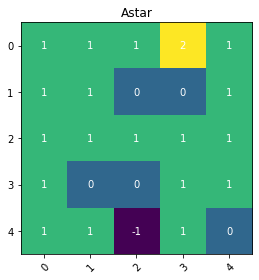

In [9]:
array_of_values=[]

for row in global_object_table:
    table_row_values=[]

    for element in row:

        table_row_values.append(element.value)

    array_of_values.append(table_row_values)


values = np.array(array_of_values)

fig, ax = plt.subplots()
im = ax.imshow(values)

# # Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(5), labels=[0,1,2,3,4])
ax.set_yticks(np.arange(5), labels=[0,1,2,3,4])

# # # Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(global_object_table)):
    for j in range(len(global_object_table[1])):
        text = ax.text(j, i, values[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Astar")
fig.tight_layout()
plt.show()
